# MVP - Engenharia de Dados 
**Aluna**: Laura Orsatti Saghabi

## INTRODUÇÃO

**Descrição do MVP**: Neste trabalho, você deverá ser capaz de construir um pipeline de dados utilizando tecnologias na nuvem. O pipeline irá envolver a busca, coleta, modelagem, carga e análise dos dados.

**Objetivo do trabalho**: Como o cenário de avaliações de filmes e séries mudou ao longo do tempo e quais fatores influenciam a popularidade e a qualidade das produções?

**Perguntas a serem respondidas**: 
1. Quais gêneros de filmes tiveram maior crescimento em popularidade nos últimos anos?
2. Como a avaliação média de filmes e séries evoluiu ao longo das décadas??
3. Quais gêneros são mais bem avaliados e quais têm pior recepção?
4. Diretores influenciam diretamente as notas das produções?
5. O número de votos influencia a nota média de um filme ou série?

**Plataforma utilizada**: Databricks Community Edition.

**Fases do trabalho**:
1. Busca pelos dados
2. Coleta
3. Modelagem
4. Carga
5. Análise - a. Qualidade de dados e b. Solução do problema
6. Entrega

## BUSCA PELOS DADOS

Dentre os sites com bases de dados gratuitas sugeridas pela Puc-Rio, selecionei quatro bases de dados que encontrei no seguinte site:

IMDB (https://datasets.imdbws.com/).

**Base de Dados utilizadas**:
- title_basics.tsv, title_ratings.tsv, name_basics.tsv e title_crew.tsv: https://developer.imdb.com/non-commercial-datasets/


Abaixo, um **resumo** do que contém em cada uma das bases de dados selecionadas:
1. **title_basics.tsv**
Contém informações básicas sobre títulos (filmes, séries, curtas, etc.).
2. **title_ratings.tsv**
Contém informações sobre as avaliações dos filmes pelo público. 
3. **name_basics.tsv**
Contém informações sobre pessoas (atores, diretores, roteiristas, etc.).
4. **title_crew.tsv**
Contém informações sobre os diretores e roteiristas de cada filme.

## COLETA

Carreguei os arquivos no Databriks no Workspace Movies e Notebook chamado "CarregamentoDados".

O código abaixo foi executado para criar a sessão Spark, carregar os arquivos CSV e TSV e exibir as primeiras linhas de cada dataset.

In [0]:
# Importações de pacotes

import pandas as pd
import io
import requests


In [0]:
# Importação da tabela title_basics

url = "https://datasets.imdbws.com/title.basics.tsv.gz"
title_basics_df = pd.read_csv(url, compression='gzip', sep='\t')

# cinco primeiras linhas para conhecermos as colunas e os dados
title_basics_df.head()

<command-4477282198127040>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics_df = pd.read_csv(url, compression='gzip', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [0]:
# Importação da tabela title_ratings

url = "https://datasets.imdbws.com/title.ratings.tsv.gz"
title_ratings_df = pd.read_csv(url, compression='gzip', sep='\t')

# cinco primeiras linhas para conhecermos as colunas e os dados
title_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2144
1,tt0000002,5.5,290
2,tt0000003,6.5,2180
3,tt0000004,5.3,186
4,tt0000005,6.2,2920


In [0]:
# Importação da tabela name_basics

url = "https://datasets.imdbws.com/name.basics.tsv.gz"
name_basics_df = pd.read_csv(url, compression='gzip', sep='\t')

# cinco primeiras linhas para conhecermos as colunas e os dados
name_basics_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [0]:
# Importação da tabela title_crew

url = "https://datasets.imdbws.com/title.crew.tsv.gz"
title_crew_df = pd.read_csv(url, compression='gzip', sep='\t')

# cinco primeiras linhas para conhecermos as colunas e os dados
title_crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


## TRATAMENTO DOS DADOS

### title_basics_df

In [0]:
title_basics_df.shape

Out[6]: (11563495, 9)

In [0]:
title_basics_df = title_basics_df.drop(columns=['runtimeMinutes', 'endYear'])
title_basics_df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,Short


In [0]:
title_basics_df.shape

Out[8]: (11563495, 7)

In [0]:
title_basics_df.count()

Out[9]: tconst           11563495
titleType        11563495
primaryTitle     11563483
originalTitle    11563483
isAdult          11563495
startYear        11563495
genres           11562754
dtype: int64

In [0]:
title_basics_df.replace("\\N", pd.NA, inplace=True)

In [0]:
# a exclusão ainda mantém uma boa amostra do dataset, possibilitando uma análise ainda qualificada
title_basics_df = title_basics_df.dropna()
print(title_basics_df.count())

tconst           9712093
titleType        9712093
primaryTitle     9712093
originalTitle    9712093
isAdult          9712093
startYear        9712093
genres           9712093
dtype: int64


In [0]:
print(title_basics_df.dtypes)

tconst           object
titleType        object
primaryTitle     object
originalTitle    object
isAdult          object
startYear        object
genres           object
dtype: object


In [0]:
# Agora converter para inteiro
# Converter todos os valores para string e depois para inteiro
title_basics_df['isAdult'] = title_basics_df['isAdult'].astype(str).astype('Int64')

In [0]:
# Converter 'startYear' para numérico (ignorar erros para evitar problemas com valores inválidos)
title_basics_df['startYear'] = pd.to_numeric(title_basics_df['startYear'], errors='coerce').astype('Int64')
print(title_basics_df.dtypes)
title_basics_df.head(5)

tconst           object
titleType        object
primaryTitle     object
originalTitle    object
isAdult           Int64
startYear         Int64
genres           object
dtype: object


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,Short


In [0]:
title_basics_df.drop_duplicates(inplace=True)

In [0]:
title_basics_df.shape

Out[16]: (9712093, 7)

### title_ratings_df

In [0]:
title_ratings_df.shape

Out[17]: (1553024, 3)

In [0]:
title_ratings_df.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2144
1,tt0000002,5.5,290
2,tt0000003,6.5,2180
3,tt0000004,5.3,186
4,tt0000005,6.2,2920


In [0]:
print(title_ratings_df.count())

tconst           1553024
averageRating    1553024
numVotes         1553024
dtype: int64


In [0]:
title_ratings_df.replace("\\N", pd.NA, inplace=True)

In [0]:
title_ratings_df.dropna(inplace=True)

In [0]:
print(title_ratings_df.dtypes)

tconst            object
averageRating    float64
numVotes           int64
dtype: object


In [0]:
title_ratings_df.shape

Out[23]: (1553024, 3)

### name_basics_df

In [0]:
name_basics_df.shape

Out[24]: (14304508, 6)

In [0]:
name_basics_df.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [0]:
print(name_basics_df.count())

nconst               14304508
primaryName          14304504
birthYear            14304508
deathYear            14304508
primaryProfession    14304508
knownForTitles       14304508
dtype: int64


In [0]:
name_basics_df.dropna(inplace=True)

In [0]:
print(name_basics_df.dtypes)

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object


In [0]:
name_basics_df['birthYear'] = name_basics_df['birthYear'].replace('\\N', pd.NA)
name_basics_df['birthYear'] = name_basics_df['birthYear'].astype('Int64')

name_basics_df['deathYear'] = name_basics_df['deathYear'].replace('\\N', pd.NA)
name_basics_df['deathYear'] = name_basics_df['deathYear'].astype('Int64')

print(name_basics_df.dtypes)

nconst               object
primaryName          object
birthYear             Int64
deathYear             Int64
primaryProfession    object
knownForTitles       object
dtype: object


In [0]:
print(name_basics_df.count())

nconst               14304504
primaryName          14304504
birthYear              642213
deathYear              242003
primaryProfession    14304504
knownForTitles       14304504
dtype: int64


### title_crew_df

In [0]:
title_crew_df.shape

Out[31]: (11563495, 3)

In [0]:
title_crew_df.head(5)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [0]:
title_crew_df = title_crew_df.drop(columns=['writers'])

In [0]:
print(title_crew_df.count())

tconst       11563495
directors    11563495
dtype: int64


In [0]:
title_crew_df.replace("\\N", pd.NA, inplace=True)

In [0]:
title_crew_df.dropna(inplace=True)

In [0]:
print(title_crew_df.count())

tconst       6543215
directors    6543215
dtype: int64


In [0]:
print(title_crew_df.dtypes)

tconst       object
directors    object
dtype: object


## MODELAGEM e CARGA

### Sessão Spark

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("movies_imdb").getOrCreate()

In [0]:
# Verificar a Spark Session
spark.version

Out[40]: '3.3.2'

In [0]:
# Converter os DataFrames Pandas para Spark DataFrames
df_title_basics = spark.createDataFrame(title_basics_df)
df_title_ratings = spark.createDataFrame(title_ratings_df)
df_title_crew = spark.createDataFrame(title_crew_df)
df_name_basics = spark.createDataFrame(name_basics_df)

In [0]:
%sql 
DROP DATABASE movies CASCADE;

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS movies;

In [0]:
df_title_basics.write.format("delta").mode("overwrite").saveAsTable("movies.title_basics")
df_title_ratings.write.format("delta").mode("overwrite").saveAsTable("movies.title_ratings")
df_title_crew.write.format("delta").mode("overwrite").saveAsTable("movies.title_crew")
df_name_basics.write.format("delta").mode("overwrite").saveAsTable("movies.name_basics")

In [0]:
%sql
SHOW TABLES IN movies;

database,tableName,isTemporary
movies,name_basics,false
movies,title_basics,false
movies,title_crew,false
movies,title_ratings,false


### Esquema Estrela

O Esquema Estrela será formado por:
- **Fato**: fato_avaliacoes (contém as avaliações de filmes e séries)
- **Dimensões**:
  - dim_titulo (informações sobre os filmes e séries)
  - dim_genero (categoriza os gêneros)
  - dim_pessoa (dados de diretores, roteiristas, atores)

In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.dim_titulo AS
SELECT
    tb.tconst AS id_titulo,
    tb.primaryTitle AS titulo,
    tb.originalTitle AS titulo_original,
    tb.startYear AS ano_lancamento,
    tb.titleType AS tipo,
    tb.isAdult AS classificacao_adulta
FROM movies.title_basics tb;

num_affected_rows,num_inserted_rows


In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.dim_genero AS
SELECT DISTINCT
    tb.tconst AS id_titulo,
    EXPLODE(SPLIT(tb.genres, ',')) AS genero
FROM movies.title_basics tb
WHERE tb.genres IS NOT NULL;

num_affected_rows,num_inserted_rows


In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.dim_pessoa AS
SELECT DISTINCT
    nb.nconst AS id_pessoa,
    nb.primaryName AS nome,
    nb.birthYear AS ano_nascimento,
    nb.deathYear AS ano_falecimento
FROM movies.name_basics nb;

num_affected_rows,num_inserted_rows


In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.fato_avaliacoes AS
SELECT
    tr.tconst AS id_titulo,
    tr.averageRating AS nota_media,
    tr.numVotes AS num_votos
FROM movies.title_ratings tr;

num_affected_rows,num_inserted_rows


In [0]:
%sql
SHOW TABLES IN movies;

database,tableName,isTemporary
movies,dim_genero,false
movies,dim_pessoa,false
movies,dim_titulo,false
movies,fato_avaliacoes,false
movies,name_basics,false
movies,title_basics,false
movies,title_crew,false
movies,title_ratings,false


In [0]:
%sql
SELECT * FROM movies.dim_titulo LIMIT 5;

id_titulo,titulo,titulo_original,ano_lancamento,tipo,classificacao_adulta
tt0000001,Carmencita,Carmencita,1894,short,0
tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,short,0
tt0000003,Poor Pierrot,Pauvre Pierrot,1892,short,0
tt0000004,Un bon bock,Un bon bock,1892,short,0
tt0000005,Blacksmith Scene,Blacksmith Scene,1893,short,0


In [0]:
%sql
SELECT * FROM movies.dim_genero LIMIT 5;

id_titulo,genero
tt13135490,Comedy
tt13135664,Talk-Show
tt13135698,Talk-Show
tt13136072,Drama
tt13136278,News


In [0]:
%sql
SELECT * FROM movies.dim_pessoa LIMIT 5;

id_pessoa,nome,ano_nascimento,ano_falecimento
nm0000198,Gary Oldman,1958,null
nm0000294,Amanda Bearse,1958,null
nm0000375,Robert Downey Jr.,1965,null
nm0000428,D.W. Griffith,1875,1948
nm0000537,Steve McQueen,1930,1980


In [0]:
%sql
SELECT * FROM movies.fato_avaliacoes LIMIT 5;

id_titulo,nota_media,num_votos
tt0000001,5.7,2144
tt0000002,5.5,290
tt0000003,6.5,2180
tt0000004,5.3,186
tt0000005,6.2,2920


In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.rel_titulo_pessoa AS
SELECT
    tc.tconst AS id_titulo,
    EXPLODE(SPLIT(tc.directors, ',')) AS id_pessoa,
    'Diretor' AS papel
FROM movies.title_crew tc
WHERE tc.directors IS NOT NULL

num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT * FROM movies.rel_titulo_pessoa LIMIT 5;

id_titulo,id_pessoa,papel
tt0000001,nm0005690,Diretor
tt0000002,nm0721526,Diretor
tt0000003,nm0721526,Diretor
tt0000004,nm0721526,Diretor
tt0000005,nm0005690,Diretor


### Diagrama ER

Feito via lucidart

https://github.com/lsaghabi/movies/blob/96fef7a9ca6e4f4acde1f3050cde3176975e3d4b/Novo%20mural.jpeg

### Catálogo de Dados

In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.catalogo_dados (
    tabela STRING,
    nome_coluna STRING,
    tipo_dado STRING,
    descricao STRING,
    chave STRING
);

INSERT INTO movies.catalogo_dados VALUES
('fato_avaliacoes', 'id_titulo', 'STRING', 'Identificador do título', 'PK, FK'),
('fato_avaliacoes', 'nota_media', 'FLOAT', 'Nota média dada pelos usuários', '-'),
('fato_avaliacoes', 'num_votos', 'INT', 'Quantidade total de votos recebidos', '-'),
('dim_titulo', 'id_titulo', 'STRING', 'Identificador do título', 'PK'),
('dim_titulo', 'tipo_titulo', 'STRING', 'Tipo do título (filme, curta, série, etc.)', '-'),
('dim_titulo', 'titulo_primario', 'STRING', 'Nome do título', '-'),
('dim_titulo', 'titulo_original', 'STRING', 'Nome original do título', '-'),
('dim_titulo', 'ano_lancamento', 'INT', 'Ano de lançamento do título', '-'),
('dim_titulo', 'generos', 'STRING', 'Lista de gêneros do título', '-'),
('dim_pessoa', 'id_pessoa', 'STRING', 'Identificador da pessoa', 'PK'),
('dim_pessoa', 'nome', 'STRING', 'Nome do diretor', '-'),
('dim_pessoa', 'ano_nascimento', 'INT', 'Ano de nascimento', '-'),
('dim_pessoa', 'ano_falecimento', 'INT', 'Ano de falecimento (se aplicável)', '-'),
('dim_pessoa', 'principais_trabalhos', 'STRING', 'Lista de principais títulos em que trabalhou', '-'),
('rel_titulo_pessoa', 'id_titulo', 'STRING', 'Identificador do título', 'FK'),
('rel_titulo_pessoa', 'id_pessoa', 'STRING', 'Identificador do diretor', 'FK'),
('rel_titulo_pessoa', 'papel', 'STRING', 'Função da pessoa no título (neste caso, sempre "Diretor")', '-');


num_affected_rows,num_inserted_rows
17,17


In [0]:
%sql
SELECT * FROM movies.catalogo_dados;

tabela,nome_coluna,tipo_dado,descricao,chave
fato_avaliacoes,id_titulo,STRING,Identificador do título,"PK, FK"
fato_avaliacoes,nota_media,FLOAT,Nota média dada pelos usuários,-
fato_avaliacoes,num_votos,INT,Quantidade total de votos recebidos,-
dim_titulo,id_titulo,STRING,Identificador do título,PK
dim_titulo,tipo_titulo,STRING,"Tipo do título (filme, curta, série, etc.)",-
dim_titulo,titulo_primario,STRING,Nome do título,-
dim_titulo,titulo_original,STRING,Nome original do título,-
dim_titulo,ano_lancamento,INT,Ano de lançamento do título,-
dim_titulo,generos,STRING,Lista de gêneros do título,-
dim_pessoa,id_pessoa,STRING,Identificador da pessoa,PK


## ANÁLISE

### Qualidade dos dados

In [0]:
from pyspark.sql.functions import col, count, when

In [0]:
# Função para verificar valores nulos e duplicados
def check_data_quality(df, table_name):
    print(f"\nVerificando a qualidade dos dados na tabela {table_name}:\n")
    
    # Verificar valores nulos
    null_count = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    null_count.show()

    # Verificar duplicatas
    duplicate_count = df.distinct().count()
    print(f"\nNúmero de duplicatas na tabela {table_name}: {df.count() - duplicate_count}")

# Verificar qualidade dos dados nas tabelas
check_data_quality(df_title_basics, "title_basics")
check_data_quality(df_title_ratings, "title_ratings")
check_data_quality(df_title_crew, "title_crew")
check_data_quality(df_name_basics, "name_basics")


Verificando a qualidade dos dados na tabela title_basics:

+------+---------+------------+-------------+-------+---------+------+
|tconst|titleType|primaryTitle|originalTitle|isAdult|startYear|genres|
+------+---------+------------+-------------+-------+---------+------+
|     0|        0|           0|            0|      0|        0|     0|
+------+---------+------------+-------------+-------+---------+------+


Número de duplicatas na tabela title_basics: 0

Verificando a qualidade dos dados na tabela title_ratings:

+------+-------------+--------+
|tconst|averageRating|numVotes|
+------+-------------+--------+
|     0|            0|       0|
+------+-------------+--------+


Número de duplicatas na tabela title_ratings: 0

Verificando a qualidade dos dados na tabela title_crew:

+------+---------+
|tconst|directors|
+------+---------+
|     0|        0|
+------+---------+


Número de duplicatas na tabela title_crew: 0

Verificando a qualidade dos dados na tabela name_basics:

+-----

Não há valores nulos, exceto para as colunas 'birthYear' e 'deathYear'. Também não há valores em duplicidade.

In [0]:
df_title_ratings.select("averageRating", "numVotes").describe().show()

+-------+------------------+------------------+
|summary|     averageRating|          numVotes|
+-------+------------------+------------------+
|  count|           1553024|           1553024|
|   mean| 6.951190516051216|1024.2345559373198|
| stddev|1.3880097783155743|17822.275446001524|
|    min|               1.0|                 5|
|    max|              10.0|           3026798|
+-------+------------------+------------------+



- A nota média dos filmes/séries é 6.95, com um desvio padrão de 1.39.
- A nota mínima é 1.0 e a máxima 10.0.
- O número de votos varia bastante (média de 1.024 votos, mas com um desvio padrão alto, 17.821 votos). Há filmes/séries com pouquíssimos votos e outros com milhões (máximo: 3.025.763 votos).

In [0]:
df_title_basics.select("startYear").describe().show()

+-------+------------------+
|summary|         startYear|
+-------+------------------+
|  count|           9712093|
|   mean|2006.6154872075463|
| stddev|19.854406077632582|
|    min|              1874|
|    max|              2031|
+-------+------------------+



- O dado mais antigo é de 1874 e o mais recente de 2031 (entendo ser filmes/séries planejados, o que pode não ser relevante).
- A média está em 2006, o que sugere uma predominância de produções recentes, do século XXI.

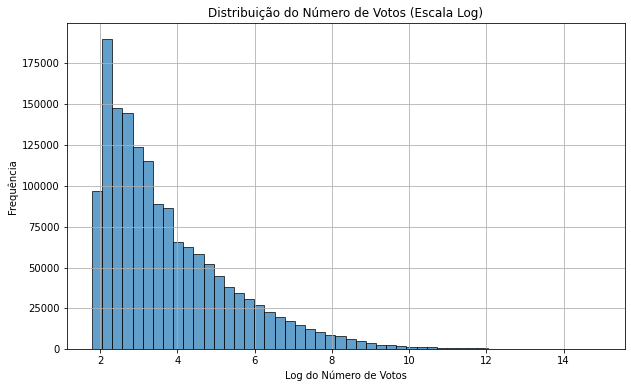

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Coletar os dados da coluna numVotes
votes_df = df_title_ratings.select("numVotes").toPandas()

# Aplicar log-transformação para melhor visualização
votes_df["log_numVotes"] = np.log1p(votes_df["numVotes"])

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(votes_df["log_numVotes"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Log do Número de Votos")
plt.ylabel("Frequência")
plt.title("Distribuição do Número de Votos (Escala Log)")
plt.grid(True)
plt.show()

O histograma confirma que a maioria dos títulos tem poucos votos. Isso significa que apenas um pequeno número de filmes e séries acumulam um alto número de votos, enquanto a grande maioria tem avaliações muito baixas.

Essa tendência é comum em plataformas de avaliação, onde poucos títulos populares recebem milhões de votos, enquanto produções menos conhecidas recebem poucos votos.

### Solução do Problema

#### 5. O número de votos influencia a nota média de um filme ou série?

In [0]:
from pyspark.sql.functions import col

correlation = df_title_ratings.stat.corr("numVotes", "averageRating")
print(f"Correlação entre número de votos e nota média: {correlation:.2f}")

Correlação entre número de votos e nota média: 0.01


Não influencia. A correlação de 0.01 indica que praticamente não há relação linear entre o número de votos e a nota média. Em outras palavras, filmes/séries com mais votos não necessariamente têm notas mais altas ou mais baixas de forma previsível.

#### 4. Diretores influenciam diretamente as notas das produções?

In [0]:
%sql
WITH exploded_directors AS (
    SELECT tconst, EXPLODE(SPLIT(directors, ',')) AS director_id /* Divide diretores em uma lista, e associa cada filme com um diretor */
    FROM movies.title_crew
)
SELECT e.director_id, n.primaryName, AVG(r.averageRating) AS avg_rating
FROM exploded_directors e
JOIN movies.name_basics n ON e.director_id = n.nconst /* relaciona o diretor com seu nome na tabela name_basics */
JOIN movies.title_ratings r ON e.tconst = r.tconst /* traz a nota média */
GROUP BY e.director_id, n.primaryName /* agrupa por diretor */
ORDER BY avg_rating DESC;

director_id,primaryName,avg_rating
nm10593946,Rodrigo Campos,10.0
nm11015952,Wayne Nelson,10.0
nm0056085,Kathryn Barnier,10.0
nm11111807,Khalim Davis,10.0
nm0430043,Judi Jordan,10.0
nm13009737,Nicole Pavia,10.0
nm10088621,Christian Kim,10.0
nm14470455,Irfan Shekh,10.0
nm0288354,J.R. Fountain,10.0
nm14943093,Emiliano Canova,10.0


In [0]:
%sql
SELECT AVG(averageRating) AS global_avg_rating
FROM movies.title_ratings;

global_avg_rating
6.951190516051216


In [0]:
%sql
CREATE TABLE movies.directors_analysis AS
WITH director_avg AS (
    SELECT e.director_id, n.primaryName, 
           COUNT(r.tconst) AS total_movies, 
           AVG(r.averageRating) AS avg_rating
    FROM (SELECT tconst, EXPLODE(SPLIT(directors, ',')) AS director_id FROM movies.title_crew) e
    JOIN movies.name_basics n ON e.director_id = n.nconst
    JOIN movies.title_ratings r ON e.tconst = r.tconst
    GROUP BY e.director_id, n.primaryName
)
SELECT *
FROM director_avg
WHERE total_movies >= 10
ORDER BY avg_rating DESC;


num_affected_rows,num_inserted_rows


In [0]:
df_directors = spark.read.table("movies.directors_analysis")
df_directors.show(5)

+-----------+-------------+------------+-----------------+
|director_id|  primaryName|total_movies|       avg_rating|
+-----------+-------------+------------+-----------------+
|  nm1475126|Cat Santarosa|         499|9.962124248497005|
|  nm5092513| Bülent Dogan|         123|9.930081300813015|
|  nm9368683|  Yash Hatkar|          10|             9.92|
| nm10801794| Rahul Dhiman|          10|             9.92|
| nm16850484|Kubilay Koçak|          37|9.891891891891891|
+-----------+-------------+------------+-----------------+
only showing top 5 rows



In [0]:
%sql
SELECT primaryName, avg_rating, total_movies
FROM movies.directors_analysis
WHERE total_movies >= 10
ORDER BY avg_rating DESC
LIMIT 10;

primaryName,avg_rating,total_movies
Cat Santarosa,9.962124248497005,499
Bülent Dogan,9.930081300813015,123
Yash Hatkar,9.92,10
Rahul Dhiman,9.92,10
Kubilay Koçak,9.891891891891891,37
Simon Thaur,9.8875,16
Maria Agrapidou,9.87857142857143,14
Christopher Michale Dailey,9.876582278481026,158
Krupesh Thacker,9.852941176470589,17
Kristen Howe,9.836363636363636,11


In [0]:
%sql
SELECT primaryName, avg_rating, total_movies
FROM movies.directors_analysis
WHERE total_movies >= 10
ORDER BY avg_rating ASC
LIMIT 10;

primaryName,avg_rating,total_movies
Andrey Gromov,1.143023255813953,86
Aleksandr G.,1.18,10
Tony Watt,1.240909090909091,22
Danil Andreev,1.310909090909091,55
Vivita,1.3166666666666667,12
María Antolini,1.428,25
Nikita Derney,1.529411764705882,17
Vladislav Averbakh,1.6000000000000003,18
L. Ron Hubbard,1.61,10
Jose Fernández Riveiro,1.688235294117647,17


In [0]:
%sql
SELECT 
    COUNT(*) AS total_directors,
    MIN(avg_rating) AS min_rating,
    MAX(avg_rating) AS max_rating,
    AVG(avg_rating) AS mean_rating,
    STDDEV(avg_rating) AS stddev_rating
FROM movies.directors_analysis;

total_directors,min_rating,max_rating,mean_rating,stddev_rating
30792,1.143023255813953,9.962124248497005,6.897587972915325,0.9168262226206574


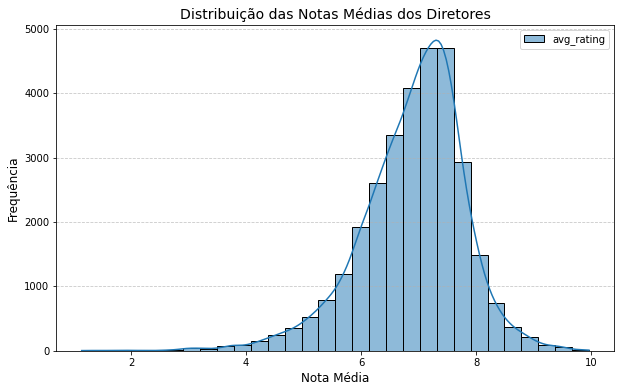

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_directors.select("avg_rating").toPandas(), bins=30, kde=True)

# Adicionando títulos e rótulos
plt.title("Distribuição das Notas Médias dos Diretores", fontsize=14)
plt.xlabel("Nota Média", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

De um todas de 30.781 diretores, alguns diretores tem notas muito baixas (1,14) e outros com notas muito altas (9,96). O desvio padrão indica essa grande variação. Aparentemente, os diretores influenciam a qualidade das produções, uma vez que há uma variação das notas médias de cada um.

#### 1. Quais gêneros de filmes tiveram maior crescimento em popularidade nos últimos anos?

In [0]:
%sql 
CREATE TABLE if not exists movies.genre_popularity AS
WITH exploded_genres AS (
    SELECT tconst, startYear, EXPLODE(SPLIT(genres, ',')) AS genre
    FROM movies.title_basics
),
genre_popularity AS (
    SELECT e.genre, e.startYear, 
           AVG(r.averageRating) AS avg_rating, 
           SUM(r.numVotes) AS total_votes
    FROM exploded_genres e
    JOIN movies.title_ratings r ON e.tconst = r.tconst
    WHERE e.startYear >= 2000 -- Filtrando filmes lançados desde 2000
    GROUP BY e.genre, e.startYear
)
SELECT * 
FROM genre_popularity
ORDER BY startYear DESC, total_votes DESC;

num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT * FROM movies.genre_popularity LIMIT 50;

genre,startYear,avg_rating,total_votes
Drama,2025,7.585050553683196,1781058
Action,2025,7.679826635145784,1522640
Adventure,2025,7.946361940298507,1167856
Comedy,2025,7.291633752244168,710582
Crime,2025,7.412570621468927,690826
Thriller,2025,7.194368340943685,607641
Animation,2025,7.677307692307692,534505
Mystery,2025,7.383752093802344,498466
Fantasy,2025,7.438647342995169,411003
Romance,2025,7.712317666126417,343206


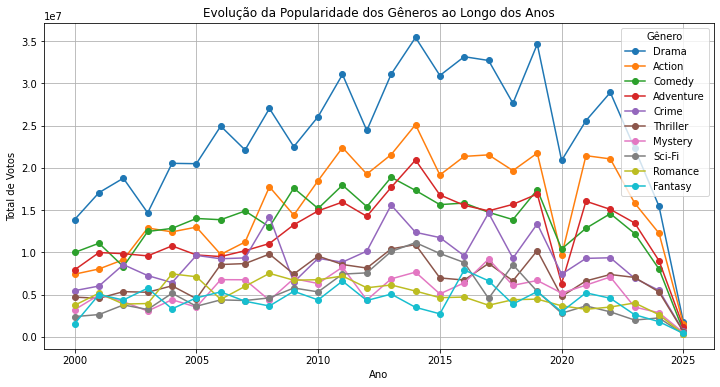

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados da tabela que geramos no SQL
df_genre_popularity = spark.read.table("movies.genre_popularity").toPandas()

# Filtrar apenas os gêneros mais populares (podemos ajustar esse critério)
top_genres = df_genre_popularity.groupby("genre")["total_votes"].sum().nlargest(10).index
df_filtered = df_genre_popularity[df_genre_popularity["genre"].isin(top_genres)]

# Criar o gráfico
plt.figure(figsize=(12, 6))
for genre in top_genres:
    df_plot = df_filtered[df_filtered["genre"] == genre]
    plt.plot(df_plot["startYear"], df_plot["total_votes"], marker='o', label=genre)

plt.xlabel("Ano")
plt.ylabel("Total de Votos")
plt.title("Evolução da Popularidade dos Gêneros ao Longo dos Anos")
plt.legend(title="Gênero")
plt.grid(True)
plt.show()

Os gêneros Drama e Ação possuem inclinação ascendente e são mais constantes, indicando popularidade crescente.

Já os gêneros Comédia, Aventura e Thriller também mostram crescimento, mas não tão acentuado quanto Drama e Ação.

E os gêneros Romance e Fantasia parecem manter uma popularidade estável ou ter crescido menos.

#### 3. Quais gêneros são mais bem avaliados e quais têm pior recepção?

In [0]:
print(df_genre_popularity.columns)


Index(['genre', 'startYear', 'avg_rating', 'total_votes'], dtype='object')


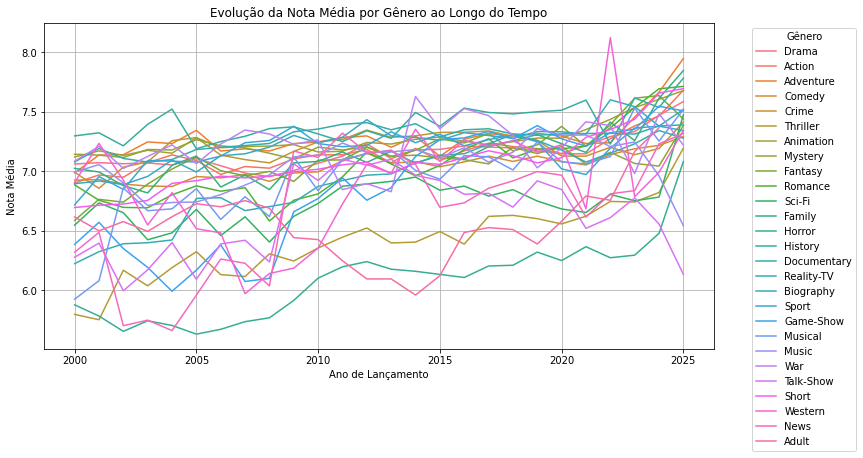

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_genre_popularity, x="startYear", y="avg_rating", hue="genre")

# Configurações do gráfico
plt.title("Evolução da Nota Média por Gênero ao Longo do Tempo")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Nota Média")
plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [0]:
%sql
CREATE TABLE IF NOT EXISTS movies.genres_avg AS
WITH exploded_genres AS (
    SELECT tconst, EXPLODE(SPLIT(genres, ',')) AS genre /* Separa múltiplos gêneros por filme */
    FROM movies.title_basics
)
SELECT e.genre, COUNT(r.tconst) AS total_movies, AVG(r.averageRating) AS avg_rating
FROM exploded_genres e
JOIN movies.title_ratings r ON e.tconst = r.tconst
GROUP BY e.genre
HAVING total_movies >= 50  -- Filtra gêneros com pelo menos 50 filmes para evitar distorções
ORDER BY avg_rating DESC;

num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT * FROM movies.genres_avg LIMIT 50;

genre,total_movies,avg_rating
History,47534,7.3611204611436
Biography,32347,7.235230469595328
Documentary,200033,7.233723935550639
Animation,188178,7.145676434014591
Adventure,174591,7.115092988756572
Crime,165430,7.102624070603898
Game-Show,39595,7.100818285137016
Mystery,75233,7.09323435194662
Family,112193,7.088881659283552
Sport,31454,7.079325364023657


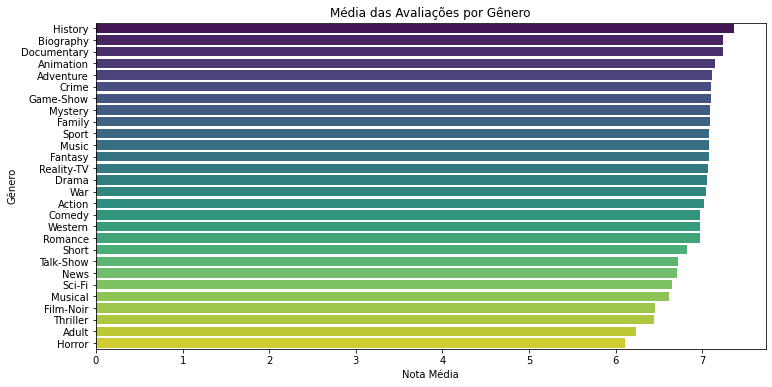

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df_genres_avg = spark.read.table("movies.genres_avg").toPandas()

# Ordenar por nota média
df_genres_avg = df_genres_avg.sort_values(by="avg_rating", ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x="avg_rating", y="genre", data=df_genres_avg, palette="viridis")
plt.xlabel("Nota Média")
plt.ylabel("Gênero")
plt.title("Média das Avaliações por Gênero")
plt.show()

A maioria dos gêneros fica em uma faixa entre 6 e 7 de média.

Não há gêneros extremamente mal avaliados nem gêneros que possuem notas muito altas.

#### 2. Como a avaliação média de filmes e séries evoluiu ao longo das décadas?

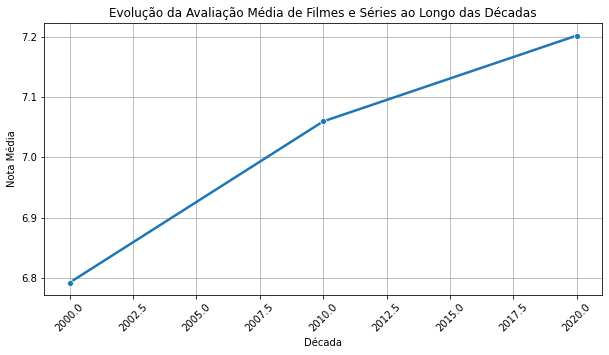

In [0]:
from pyspark.sql.functions import col, floor, avg

# Carregar os dados da tabela
df_ratings = spark.read.table("movies.genre_popularity")

# Filtrar apenas os filmes com um ano válido
df_ratings = df_ratings.filter((col("startYear") >= 1900) & (col("startYear") <= 2025))

# Criar uma coluna de décadas (ex: 1993 → 1990)
df_ratings = df_ratings.withColumn("decade", (floor(col("startYear") / 10) * 10).cast("int"))

# Agrupar por década e calcular a média das avaliações
df_decades = df_ratings.groupBy("decade").agg(avg("avg_rating").alias("mean_rating")).orderBy("decade")

# Converter para Pandas para visualização
pdf = df_decades.toPandas()

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(x=pdf["decade"], y=pdf["mean_rating"], marker="o", linewidth=2.5)

# Configurações do gráfico
plt.title("Evolução da Avaliação Média de Filmes e Séries ao Longo das Décadas")
plt.xlabel("Década")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


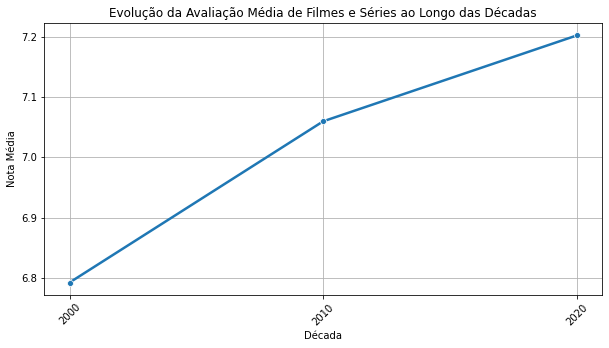

In [0]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#from pyspark.sql.functions import col, floor, avg

# Carregar os dados da tabela
df_ratings = spark.read.table("movies.genre_popularity")

# Filtrar apenas os filmes com um ano válido
df_ratings = df_ratings.filter((col("startYear") >= 1900) & (col("startYear") <= 2025))

# Criar uma coluna de décadas (ex: 1993 → 1990)
df_ratings = df_ratings.withColumn("decade", (floor(col("startYear") / 10) * 10).cast("int"))

# Agrupar por década e calcular a média das avaliações
df_decades = df_ratings.groupBy("decade").agg(avg("avg_rating").alias("mean_rating")).orderBy("decade")

# Converter para Pandas para visualização
pdf = df_decades.toPandas()

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(x=pdf["decade"], y=pdf["mean_rating"], marker="o", linewidth=2.5)

# Configurações do gráfico
plt.title("Evolução da Avaliação Média de Filmes e Séries ao Longo das Décadas")
plt.xlabel("Década")
plt.ylabel("Nota Média")

# Definir as décadas corretamente no eixo X
plt.xticks(pdf["decade"], rotation=45)

plt.grid(True)
plt.show()


As avaliações médias das produções aumentaram, o que pode indicar que produções mais recentes são melhor avaliadas pelo público ou que os critérios de avaliação mudaram.

A melhora na qualidade técnica das produções podem ter influenciado, assim como as ferramentas de avalição que ficaram mais acessíveis e objetivas (vide a facilidade de avaliar um filme no Netflix, por exemplo).

## CONCLUSÃO E AUTOAVALIAÇÃO

#### Possíveis conclusões
**Evolução das avaliações ao longo do tempo**: A nota média das produções apresentou um crescimento constante, indicando uma possível melhora na qualidade técnica e maior acesso a plataformas de avaliação.

**Popularidade dos gêneros**: Alguns gêneros, como Drama e Ação, mantiveram-se entre os mais populares, enquanto gêneros como Romance e Fantasia se mantiveram constantes.

**Impacto de diretores**: O impacto dos diretores não pareceu relevante.

**Correlação entre duração e nota média**: A duração dos filmes não teve muita correlação com a qualidade percebida.

#### Considerações finais
Acredito que seria interessante analisar mais profundamente os gêneros, realizando, talvez, um filtro do que é filme e do que é programa de TV, por exemplo.
Seria interessante, também, um estudo mais aprofundado dos fatores que determinam as avaliações.

Acredito que faltou uma exploração mais aprofundada.

#### Autoavaliação
Senti dificuldade em manter sempre a mesma linguagem, e principalmente em usar spark.

No início tentei utilizar a base movies_metadata.csv do Kaggle para tentar analisar orçamentos, mas desisti quando estava fazendo os primeiros tratamentos, portanto, mudei os planos.

Tive dificuldade em fazer as camadas.

Vale ressaltar que fiz as escolhas das bases antes de ver o exemplo comaprtilhado pelo professor.

A base de dados é muito interessante e muitos insights ainda podem ser tirados dela.